# Lecture 2 plots

This example was taken from [**here**](https://scipy-lectures.org/intro/scipy/auto_examples/plot_optimize_example2.html) and adapted to our class needs.

In [1]:
# import libraries
import numpy as np  # numpy for numerical computation
import matplotlib.pyplot as plt  # matplotlib for plotting
from seaborn import despine  # easy manipulation of axes
from scipy import optimize  # to find optimal roots

In [2]:
# define our mesh
x = np.arange(-10, 10, 0.1)

# now define a brief function
def f(x):
    return x**2 + 10*np.sin(x)

# find the first root
root1 = optimize.root(f, 1)  # our initial guess is 1
print("First root found %s" % root1.x)

#find the second root
root2 = optimize.root(f, -2.5)
print("Second root found %s" % root2.x)

First root found [0.]
Second root found [-2.47948183]


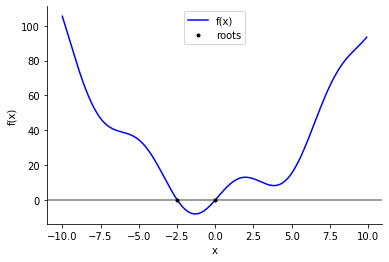

In [5]:
# make a figure
fig = plt.figure(figsize=(6, 4))
# add a plot
ax = fig.add_subplot(111)

# plot f(x)
ax.plot(x, f(x), 'b-', label="f(x)")

# add the 0-axis
ax.axhline(0, color='gray')

# plot roots
roots = np.array([root1.x, root2.x])
ax.plot(roots, f(roots), 'k.', label="roots")

# decorate plot
ax.legend(loc='best')
ax.set_xlabel('x')
ax.set_ylabel('f(x)')

despine() # remove top and right axes
plt.savefig('roots.pdf', format='pdf')  # save the figure for our lecture
plt.show()  # show the plot on the screen

In [31]:
def bisection(x_l, x_u, f, x_r, treshold=0.005):
    f_l = f(x_l)
    error = 1
    
    while error > treshold:
        x_old = x_r
        
        x_r = (x_l + x_u) / 2
        f_r = f(x_r)
        
        error = abs((x_old - x_r) / x_old)
        
        test = f_l * f_r
        
        if test < 0:
            x_u = x_r
        elif test > 0:
            x_l = x_r
            f_l = f_r
        else:
            error = 0

    return x_r

In [32]:
bisection(-3, -2, f, -2)

-2.4765625